
##  The Jupyter notebook analyzes the shoe data for men's road running shoes


In [1]:

import numpy as np   
import pandas as pd  
import seaborn as sns   
import matplotlib.pyplot as plt     

%matplotlib inline 
%config InlineBackend.figure_format = 'svg'   


###  1.  Exploring the cleaned overall dataset 

In [2]:
''' Load and view first few data rows '''

df_long = pd.read_csv('all_short_clean.csv')  
df_long.head(10)     


,Brand,Model,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
0,361 Degrees,Sensation 4,17,135.00,NaN,12.2,NaN,NaN,NaN
1,361 Degrees,Sensation 4,17,135.00,NaN,12.2,NaN,NaN,NaN
2,361 Degrees,Strata 3,17,155.00,5.0,12.0,100.0,100.0,100.0
3,361 Degrees,Strata 3,17,155.00,5.0,12.0,100.0,100.0,100.0
4,Adidas,I-5923,71,130.00,5.0,9.0,NaN,NaN,NaN
5,Adidas,Runfalcon,71,60.00,NaN,10.4,NaN,NaN,NaN
6,Adidas,90s Valasion,71,48.00,NaN,12.4,NaN,NaN,NaN
7,Adidas,Alphabounce 3,71,91.88,4.0,10.2,100.0,100.0,83.0
8,Adidas,Alphabounce 3,71,100.00,4.0,10.2,100.0,100.0,83.0
9,Adidas,Alphabounce 3,71,89.36,4.0,10.2,100.0,100.0,83.0


In [3]:

df_long.describe() 

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
count,981.000000,981.000000,888.000000,981.000000,852.000000,852.000000,852.000000
mean,65.889908,109.327849,4.211712,10.852742,84.329812,88.607981,77.406103
std,40.364286,37.689324,0.585621,2.485526,14.961381,13.032864,15.592244
min,7.000000,38.000000,1.000000,0.800000,33.000000,50.000000,33.000000
25%,24.000000,75.000000,4.000000,9.200000,78.750000,83.000000,67.000000
50%,71.000000,110.000000,4.000000,10.400000,86.000000,92.000000,77.000000
75%,106.000000,135.000000,5.000000,12.000000,100.000000,100.000000,89.000000
max,122.000000,199.990000,5.000000,26.000000,100.000000,100.000000,100.000000


In [4]:

df_long.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            981 non-null    object 
 1   Model            981 non-null    object 
 2   AgeOfBrand(yrs)  981 non-null    int64  
 3   Price(USD)       981 non-null    float64
 4   Stars            888 non-null    float64
 5   Weight(oz)       981 non-null    float64
 6   TrueToSize(%)    852 non-null    float64
 7   TrueToWidth(%)   852 non-null    float64
 8   ArchSupport(%)   852 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 69.1+ KB


In [5]:
df_long.shape 

(981, 9)

In [6]:

df_long.corr() 

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
AgeOfBrand(yrs),1.000000,-0.039817,-0.048148,0.119944,0.087394,-0.041741,0.130509
Price(USD),-0.039817,1.000000,-0.136835,0.266012,0.001247,-0.035582,-0.181097
Stars,-0.048148,-0.136835,1.000000,-0.027909,0.143734,0.282563,0.073956
Weight(oz),0.119944,0.266012,-0.027909,1.000000,-0.097415,0.037919,-0.132386
TrueToSize(%),0.087394,0.001247,0.143734,-0.097415,1.000000,0.419825,0.180966
TrueToWidth(%),-0.041741,-0.035582,0.282563,0.037919,0.419825,1.000000,0.062213
ArchSupport(%),0.130509,-0.181097,0.073956,-0.132386,0.180966,0.062213,1.000000


In [7]:
''' How many unique brands '''

df_long['Brand'].unique()  



array(['361 Degrees', 'Adidas', 'Altra Footwear', 'ASICS', 'ASICS Tiger',
       'Brooks', 'Hoka One One', 'Inov-8', 'MBT', 'Mizuno', 'New Balance',
       'Newton Running', 'Nike', 'On', 'Reebok', 'Saucony', 'Scott',
       'SKECHERS', 'Spira', 'Topo Athletic', 'Under Armour',
       'Vibram FiveFingers'], dtype=object)

In [8]:
''' Brand count '''

df_long['Brand'].value_counts()   


New Balance           124
Nike                  109
ASICS                 109
Brooks                101
Adidas                 85
Hoka One One           71
Saucony                70
Under Armour           64
SKECHERS               55
On                     54
Mizuno                 46
Altra Footwear         33
Topo Athletic          12
Spira                  12
Newton Running          8
MBT                     6
Inov-8                  6
Reebok                  5
361 Degrees             4
ASICS Tiger             3
Vibram FiveFingers      3
Scott                   1
Name: Brand, dtype: int64

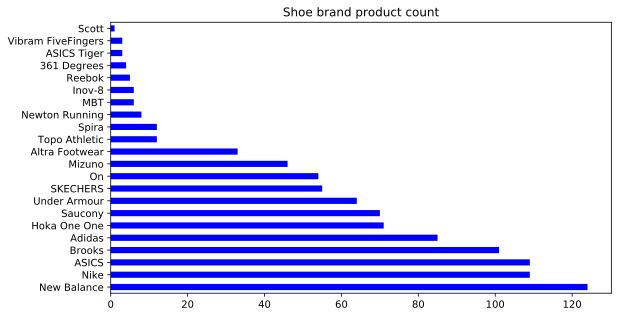

In [9]:
''' Graphing Brand count: number of models for sale '''

plt.figure(figsize = (9, 5))
df_long['Brand'].value_counts().head(50).plot(kind = 'barh', color = 'blue')  
plt.title('Shoe brand product count')  

plt.show() 


In [10]:
''' How many unique models '''

df_long['Model'].unique() 


array(['Sensation 4', 'Strata 3', 'I-5923', 'Runfalcon', '90s Valasion',
       'Alphabounce 3', 'Alphabounce RC 2', 'Astrarun', 'Duramo SL',
       'Edge XT', 'Energyfalcon', 'Nova Flow', 'Nova Run',
       'PulseBOOST HD', 'Questar Climacool', 'Response Trail',
       'SenseBOOST GO', 'SenseBOUNCE +', 'SenseBOUNCE + Street', 'SL20',
       'SL20 Ready', 'Solar Boost 19', 'Ultraboost 19', 'Ultraboost 20',
       'Ultraboost 20 SB', 'Ultraboost DNA', 'Ultraboost Parley',
       'Ultraboost S.RDY', 'Duo 1.5', 'Escalante 2', 'Paradigm 4.5',
       'Provision 4', 'Torin 4', 'Torin 4 Plush', 'Vanish XC', 'Vanish-R',
       'Viho', 'Dynaflyte 4', 'GEL-Contend 5 Walker', 'GEL-Contend 6',
       'GEL-Cumulus 21', 'GEL-Cumulus 21 Lite-Show', 'GEL-DS Trainer 25',
       'GEL-DS Trainer 26', 'GEL-DS Trainer 27', 'GEL-DS Trainer 28',
       'GEL-DS Trainer 29', 'GEL-Excite 6', 'GEL-Excite 7',
       'GEL-Kayano 26', 'GEL-Kumo Lyte', 'GEL-Nimbus 22',
       'GEL-Quantum 180 4', 'GEL-Quantum Infini

In [11]:
''' value count of the models '''

df_long['Model'].value_counts() 


Ghost 12                      20
Adrenaline GTS 20             16
GEL-Nimbus 22                 15
GEL-Kayano 26                 14
Ultraboost 20                 13
                              ..
GEL-Kumo Lyte                  1
Ride ISO                       1
SenseBOOST GO                  1
Go Run Fast - Arco - 55105     1
Go Run Focus                   1
Name: Model, Length: 299, dtype: int64

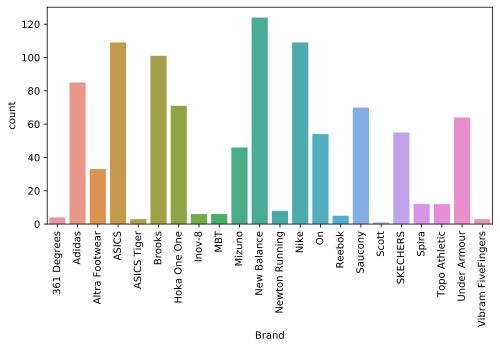

In [12]:
''' Count of number of stars vs. Brand '''

plt.figure(figsize = (8, 4))
ax = sns.countplot(df_long['Brand'], label = 'Stars')  
#ax = sns.boxplot(x= 'Brand', y = 'Price(USD)', data = df_long) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

plt.show()


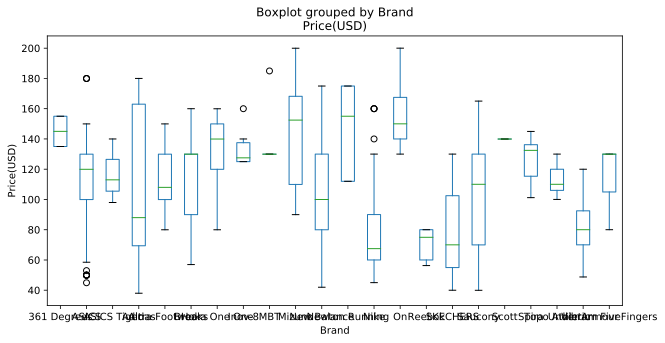

In [13]:
''' Boxplot of price range of all the Brands '''

df_score = df_long[['Brand', 'Price(USD)']]
df_score.boxplot(by = 'Brand', column = 'Price(USD)', grid = False, figsize = (10,5))
plt.ylabel('Price(USD)') 

plt.show() 


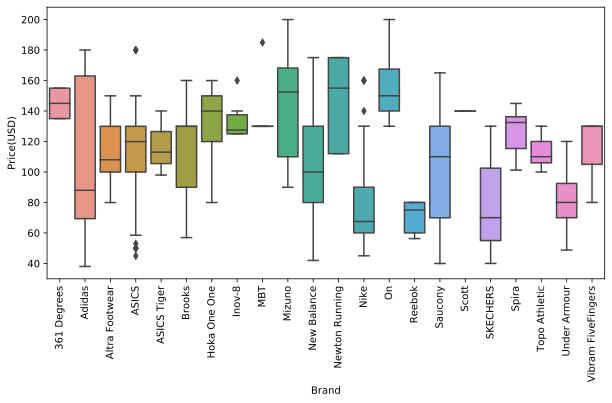

In [14]:
''' Boxplot of price range of all the Brands '''   

plt.figure(figsize = (10, 5)) 
ax = sns.boxplot(x= 'Brand', y = 'Price(USD)', data = df_long) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.title('')

plt.show()   


###  2.  Exploring the top 11 brands  

In [15]:
''' Load and view first few data rows '''

df = pd.read_csv('all_short_clean_11.csv')  
df.head(10)   


,Brand,Model,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
0,Adidas,I-5923,71,130.00,5.0,9.0,NaN,NaN,NaN
1,Adidas,Runfalcon,71,60.00,NaN,10.4,NaN,NaN,NaN
2,Adidas,90s Valasion,71,48.00,NaN,12.4,NaN,NaN,NaN
3,Adidas,Alphabounce 3,71,91.88,4.0,10.2,100.0,100.0,83.0
4,Adidas,Alphabounce 3,71,100.00,4.0,10.2,100.0,100.0,83.0
5,Adidas,Alphabounce 3,71,89.36,4.0,10.2,100.0,100.0,83.0
6,Adidas,Alphabounce 3,71,88.38,4.0,10.2,100.0,100.0,83.0
7,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0
8,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0
9,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0


In [16]:

df.describe() 

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
count,888.000000,888.000000,823.000000,888.000000,789.000000,789.000000,789.000000
mean,70.834459,108.138288,4.222357,10.918401,84.297845,88.666667,77.604563
std,38.929165,38.581014,0.581872,2.403348,14.557474,12.691544,15.183172
min,10.000000,38.000000,1.000000,5.000000,33.000000,50.000000,33.000000
25%,28.000000,73.672500,4.000000,9.200000,79.000000,83.000000,67.000000
50%,71.000000,109.950000,4.000000,10.400000,86.000000,91.000000,77.000000
75%,114.000000,135.000000,5.000000,12.000000,100.000000,100.000000,89.000000
max,122.000000,199.990000,5.000000,26.000000,100.000000,100.000000,100.000000


In [17]:
df.shape

(888, 9)

In [18]:

df.corr() 


,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
AgeOfBrand(yrs),1.000000,0.003387,-0.086086,0.113629,0.101667,-0.058272,0.128781
Price(USD),0.003387,1.000000,-0.141745,0.268450,-0.003039,-0.043901,-0.201524
Stars,-0.086086,-0.141745,1.000000,-0.066919,0.118551,0.261011,0.073879
Weight(oz),0.113629,0.268450,-0.066919,1.000000,-0.139250,0.023822,-0.195217
TrueToSize(%),0.101667,-0.003039,0.118551,-0.139250,1.000000,0.396119,0.178032
TrueToWidth(%),-0.058272,-0.043901,0.261011,0.023822,0.396119,1.000000,0.049307
ArchSupport(%),0.128781,-0.201524,0.073879,-0.195217,0.178032,0.049307,1.000000


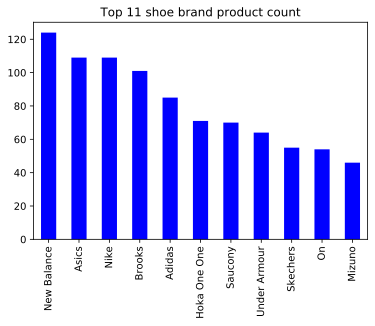

In [19]:
''' Product count offered by the shoe brands '''

df['Brand'].value_counts().plot(kind = 'bar', color = 'blue') 
plt.title('Top 11 shoe brand product count') 

plt.show()     


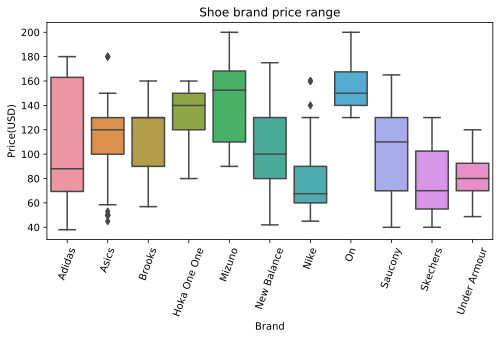

In [20]:
''' Boxplot of price range of the top 11 brands '''

plt.figure(figsize = (8, 4)) 
 
ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  
plt.title('Shoe brand price range')

plt.show()  


In [21]:
''' Median price of the top 11 brands => this info for the below box plot '''   

df.groupby('Brand')['Price(USD)'].median().sort_values(ascending = True)     


Brand
Nike             67.50
Skechers         70.00
Under Armour     80.00
Adidas           88.00
New Balance      99.99
Saucony         110.00
Asics           119.95
Brooks          129.95
Hoka One One    139.95
On              149.99
Mizuno          152.47
Name: Price(USD), dtype: float64

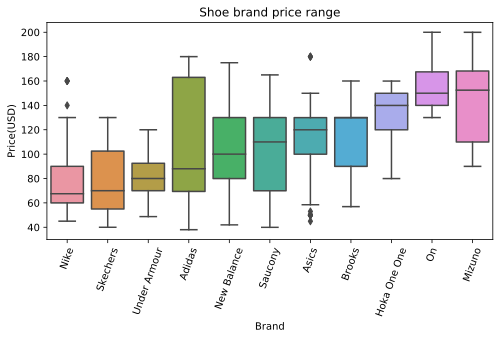

In [22]:
''' Boxplot of price range of the top 11 brands => ordered by median price '''

plt.figure(figsize = (8, 4)) 
 
#ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df, color = 'lightgreen') 
ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df, order = ['Nike', 'Skechers', 'Under Armour',
                                                                   'Adidas', 'New Balance', 'Saucony', 'Asics',
                                                                   'Brooks', 'Hoka One One', 'On', 'Mizuno']) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  
plt.title('Shoe brand price range')

plt.show()  


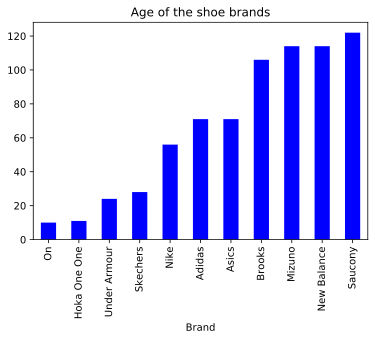

In [23]:
''' Age of the Brands '''

df.groupby('Brand')['AgeOfBrand(yrs)'].median().sort_values(ascending = True).plot.bar(color = 'blue')
plt.title('Age of the shoe brands')  

plt.show()   


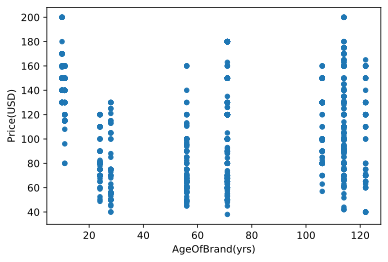

In [24]:
''' Scatter plot of price vs. Brand age '''

df.plot.scatter('AgeOfBrand(yrs)', 'Price(USD)')  

plt.show()   


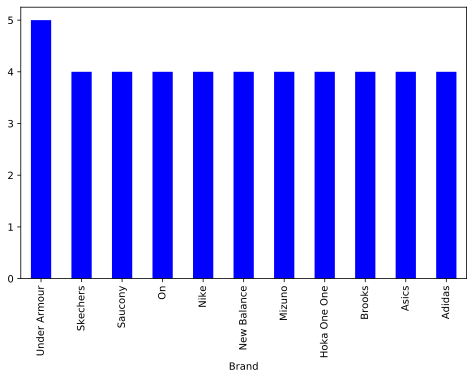

In [25]:
''' Plot of Stars vs. Brand '''


plt.figure(figsize = (8,5))
df.groupby('Brand')['Stars'].median().sort_values(ascending = False).plot.bar(color = 'b')     

plt.show() 


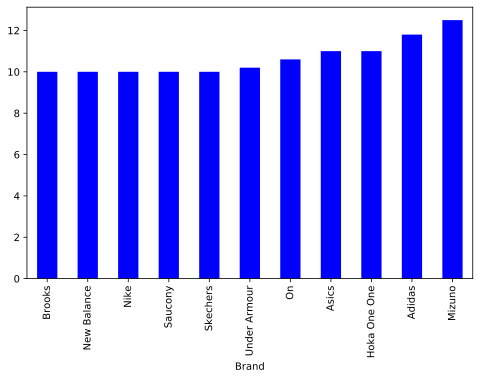

In [26]:
''' Plot of median weight of the Brands '''

plt.figure(figsize = (8,5))
df.groupby('Brand')['Weight(oz)'].median().sort_values(ascending = True).plot.bar(color = 'blue')

plt.show() 


In [27]:
''' Median Weight of the top 11 brands => this info for the below box plot '''   

df.groupby('Brand')['Weight(oz)'].median().sort_values(ascending = True)   


Brand
Brooks          10.0
New Balance     10.0
Nike            10.0
Saucony         10.0
Skechers        10.0
Under Armour    10.2
On              10.6
Asics           11.0
Hoka One One    11.0
Adidas          11.8
Mizuno          12.5
Name: Weight(oz), dtype: float64

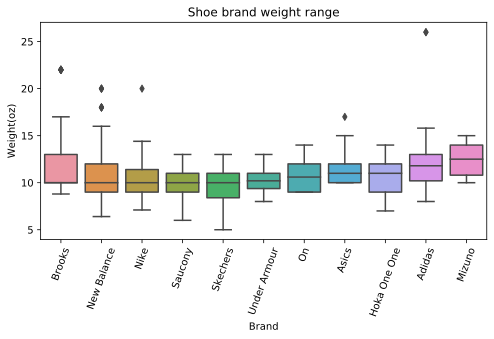

In [28]:
''' Box plot of weights '''

plt.figure(figsize = (8, 4)) 
 
#ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df, color = 'lightgreen') 
ax = sns.boxplot(x = 'Brand', y = 'Weight(oz)', data = df, order = ['Brooks', 'New Balance', 'Nike', 'Saucony',
                                                                   'Skechers', 'Under Armour', 'On', 'Asics',
                                                                   'Hoka One One', 'Adidas', 'Mizuno']) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  
plt.title('Shoe brand weight range')

plt.show()  


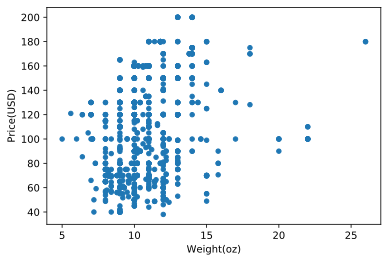

In [29]:
''' Scatter plot of Weight and Price '''   

df.plot.scatter('Weight(oz)', 'Price(USD)')   

plt.show() 


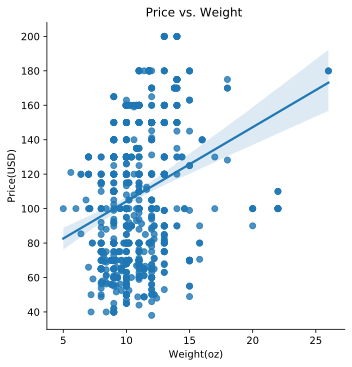

In [30]:
''' Scatter plot of Price vs. Weight using Seaborn '''

sns.lmplot("Weight(oz)", "Price(USD)", df) 
plt.title('Price vs. Weight ')

plt.show() 

In [32]:
''' Null check - number of nulls '''

df.isnull().sum().sort_values() # ascending = False)  


Brand               0
Model               0
AgeOfBrand(yrs)     0
Price(USD)          0
Weight(oz)          0
Stars              65
TrueToSize(%)      99
TrueToWidth(%)     99
ArchSupport(%)     99
dtype: int64

In [34]:
''' Null check - percent of nulls '''

np.sum(df.isnull())/len(df)  # % of missing   


Brand              0.000000
Model              0.000000
AgeOfBrand(yrs)    0.000000
Price(USD)         0.000000
Stars              0.073198
Weight(oz)         0.000000
TrueToSize(%)      0.111486
TrueToWidth(%)     0.111486
ArchSupport(%)     0.111486
dtype: float64


###  Drop the nulls     



#  *** => df1 has no nulls, it is now the target data frame <= ***    


In [35]:
''' Drop nulls for further analysis '''    

df1 = df.dropna(axis = 0, how = 'any')   
df1.head(10) 


,Brand,Model,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
3,Adidas,Alphabounce 3,71,91.88,4.0,10.2,100.0,100.0,83.0
4,Adidas,Alphabounce 3,71,100.00,4.0,10.2,100.0,100.0,83.0
5,Adidas,Alphabounce 3,71,89.36,4.0,10.2,100.0,100.0,83.0
6,Adidas,Alphabounce 3,71,88.38,4.0,10.2,100.0,100.0,83.0
7,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0
8,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0
9,Adidas,Alphabounce RC 2,71,80.00,5.0,13.0,67.0,100.0,83.0
13,Adidas,Duramo SL,71,65.00,5.0,9.0,100.0,100.0,100.0
14,Adidas,Duramo SL,71,65.00,5.0,9.0,100.0,100.0,100.0
15,Adidas,Duramo SL,71,65.00,5.0,9.0,100.0,100.0,100.0


In [36]:
df1.describe() 

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
count,789.000000,789.000000,789.00000,789.000000,789.000000,789.000000,789.000000
mean,71.571610,107.162700,4.21673,11.047376,84.297845,88.666667,77.604563
std,39.031733,38.100841,0.57655,2.302428,14.557474,12.691544,15.183172
min,10.000000,38.000000,1.00000,5.600000,33.000000,50.000000,33.000000
25%,28.000000,70.880000,4.00000,10.000000,79.000000,83.000000,67.000000
50%,71.000000,104.990000,4.00000,11.000000,86.000000,91.000000,77.000000
75%,114.000000,130.000000,5.00000,12.000000,100.000000,100.000000,89.000000
max,122.000000,199.990000,5.00000,22.000000,100.000000,100.000000,100.000000


In [37]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 3 to 887
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            789 non-null    object 
 1   Model            789 non-null    object 
 2   AgeOfBrand(yrs)  789 non-null    int64  
 3   Price(USD)       789 non-null    float64
 4   Stars            789 non-null    float64
 5   Weight(oz)       789 non-null    float64
 6   TrueToSize(%)    789 non-null    float64
 7   TrueToWidth(%)   789 non-null    float64
 8   ArchSupport(%)   789 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 61.6+ KB


In [38]:
df1.shape 

(789, 9)

In [39]:
df1.corr() 

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
AgeOfBrand(yrs),1.000000,-0.041371,-0.095796,0.090675,0.101667,-0.058272,0.128781
Price(USD),-0.041371,1.000000,-0.161309,0.262092,-0.003039,-0.043901,-0.201524
Stars,-0.095796,-0.161309,1.000000,-0.071088,0.118551,0.261011,0.073879
Weight(oz),0.090675,0.262092,-0.071088,1.000000,-0.139250,0.023822,-0.195217
TrueToSize(%),0.101667,-0.003039,0.118551,-0.139250,1.000000,0.396119,0.178032
TrueToWidth(%),-0.058272,-0.043901,0.261011,0.023822,0.396119,1.000000,0.049307
ArchSupport(%),0.128781,-0.201524,0.073879,-0.195217,0.178032,0.049307,1.000000


In [77]:
''' df1 summary table -> grouped by Brand '''     

df1.groupby('Brand').agg(['median', 'std'])   


AgeOfBrand(yrs)      Price(USD)             Stars            \
                      median  std     median        std median       std   
Brand                                                                      
Adidas                    71  0.0     80.000  47.466638    4.0  0.601281   
Asics                     71  0.0    119.950  32.251542    4.0  0.463600   
Brooks                   106  0.0    129.950  26.218158    4.0  0.313081   
Hoka One One              11  0.0    149.950  20.272757    4.0  0.314576   
Mizuno                   114  0.0    139.995  35.308295    4.0  0.430851   
New Balance              114  0.0     99.990  35.534779    4.0  0.467664   
Nike                      56  0.0     67.490  19.776931    4.0  0.796030   
On                        10  0.0    149.990  20.460621    4.0  0.725159   
Saucony                  122  0.0    110.000  38.929530    4.0  0.533638   
Skechers                  28  0.0     59.990  24.695098    5.0  0.662195   
Under Armour              24  0.0     80.000  20.032861    5.0  0.737637   

             Weight(oz)           TrueToSize(%)            TrueToWidth(%)  \
                 median       std        median        std         median   
Brand                                                                       
Adidas             11.8  2.235027          85.0  18.007544          100.0   
Asics              11.0  1.426077          88.0  12.351004           85.0   
Brooks             10.0  3.432963          87.0   8.105236           90.0   
Hoka One One       11.0  1.882119          82.0  11.939487           85.0   
Mizuno             13.0  1.708285         100.0  22.163623          100.0   
New Balance        11.0  2.904144          83.0  10.224822           86.0   
Nike               10.0  1.935974          86.0  14.899299           92.0   
On                 10.6  1.731309          81.0  11.246383           92.0   
Saucony            10.0  1.489963          90.0  17.909934          100.0   
Skechers           10.0  2.104718         100.0  19.666130          100.0   
Under Armour       10.4  1.108255          95.0  19.702467          100.0   

                        ArchSupport(%)             
                    std         median        std  
Brand                                              
Adidas         7.243764           77.0  17.271545  
Asics         10.641082           76.0  12.761038  
Brooks         7.912880           71.0  11.004149  
Hoka One One  10.776764           72.5   8.065687  
Mizuno        13.232143           83.0  19.386758  
New Balance   12.214457           77.0   9.616253  
Nike          15.652697           82.0  15.781359  
On            12.329451           73.0  14.362872  
Saucony       16.876202           90.0  16.413846  
Skechers      17.355258          100.0  18.815740  
Under Armour   3.774538           67.0  21.673379

In [40]:
''' Null check - making sure all nulls were dropped '''

df1.isnull().sum().sort_values() # ascending = False)  


Brand              0
Model              0
AgeOfBrand(yrs)    0
Price(USD)         0
Stars              0
Weight(oz)         0
TrueToSize(%)      0
TrueToWidth(%)     0
ArchSupport(%)     0
dtype: int64

In [ ]:
''' Null check - percent of nulls '''

np.sum(df1.isnull())/len(df)  # % of missing 


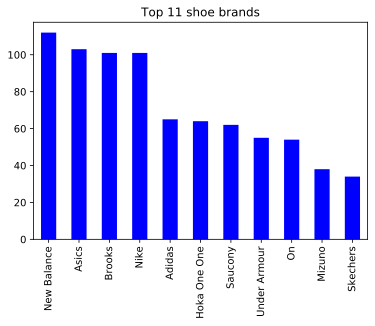

In [41]:
''' Product count offered by the shoe brands '''

df1['Brand'].value_counts().plot(kind = 'bar', color = 'blue') 
plt.title('Top 11 shoe brands') 

plt.show()     


In [42]:
''' Median price of the top 11 Brands '''

df1.groupby('Brand')['Price(USD)'].median().sort_values(ascending = True)    


Brand
Skechers         59.990
Nike             67.490
Adidas           80.000
Under Armour     80.000
New Balance      99.990
Saucony         110.000
Asics           119.950
Brooks          129.950
Mizuno          139.995
Hoka One One    149.950
On              149.990
Name: Price(USD), dtype: float64

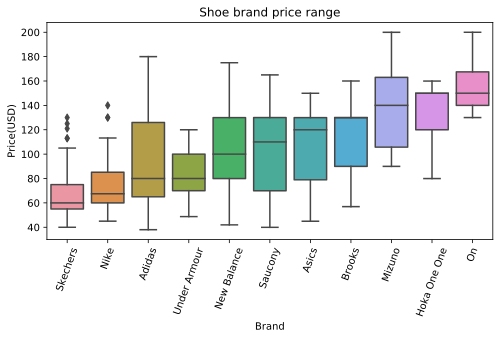

In [43]:
''' Boxplot of price range of the top 11 brands => ordered by median price '''

plt.figure(figsize = (8, 4)) 
 
#ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df1, color = 'lightgreen') 
ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df1, order = ['Skechers', 'Nike', 'Adidas',
                                                                   'Under Armour', 'New Balance', 'Saucony', 'Asics',
                                                                   'Brooks', 'Mizuno', 'Hoka One One', 'On']) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  
plt.title('Shoe brand price range')
plt.show()  



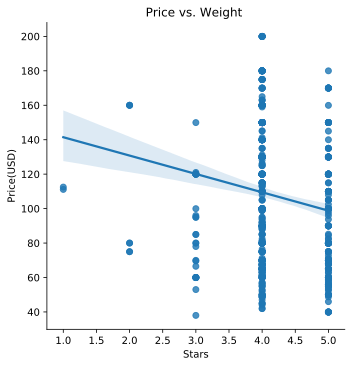

In [44]:
''' Scatter plot of Price vs. Rating '''

sns.lmplot("Stars", "Price(USD)", df1) 
plt.title('Price vs. Weight ')

plt.show() 

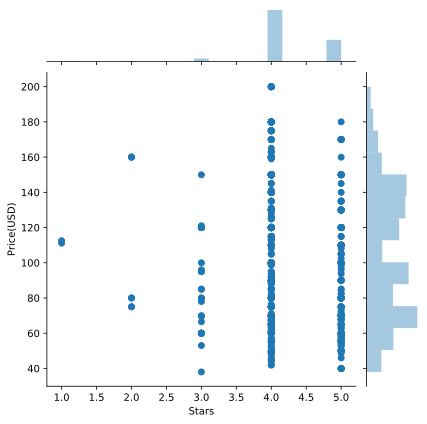

In [45]:
''' Lazyman stats plot => price vs. stars '''   

sns.jointplot(df1['Stars'], df1['Price(USD)'])  

plt.show() 


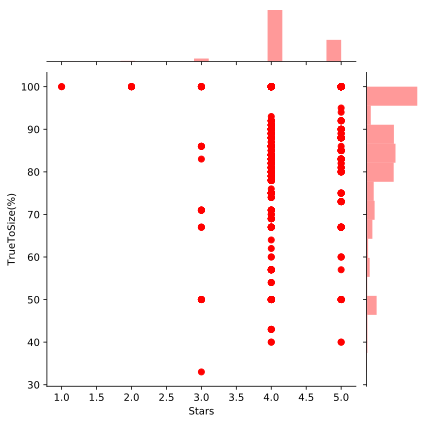

In [46]:
''' Lazyman stats plot => True-to-size vs. stars ''' 

sns.jointplot(df1['Stars'], df1['TrueToSize(%)'], color = 'red')    

plt.show() 

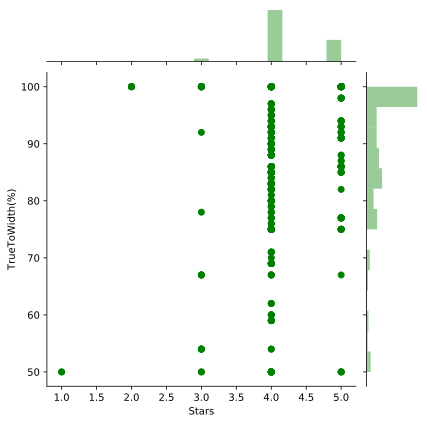

In [47]:
''' Lazyman stats plot => True-to-width vs. stars ''' 

sns.jointplot(df1['Stars'], df1['TrueToWidth(%)'], color = 'green')     

plt.show() 


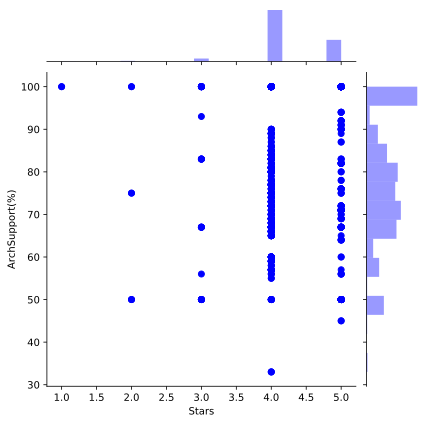

In [48]:
''' Lazyman stats plot => Arch Support vs. stars '''   

sns.jointplot(df1['Stars'], df1['ArchSupport(%)'], color = 'blue')    
plt.show() 


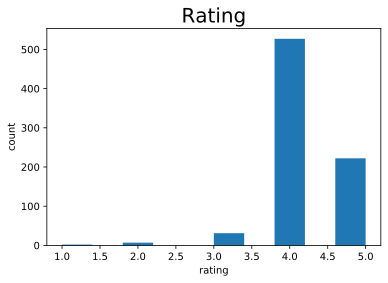

In [60]:

# histogram of stars  

# sns.distplot(df1.groupby('Brand')['Stars'])

# plt.show() 

import seaborn as sns 

plt.hist(df1['Stars'])  # python plt method 

plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating', fontsize = 20)
plt.show() 


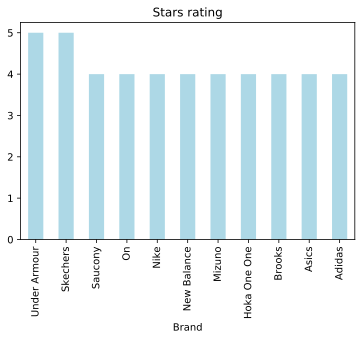

In [50]:
''' Stars '''

plt.figure(figsize = (6,4))
df1.groupby('Brand')['Stars'].median().sort_values(ascending = False).plot.bar(color = 'lightblue')     

plt.title('Stars rating')
plt.show() 





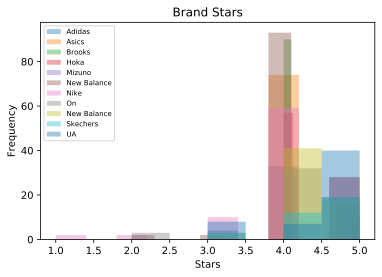

In [51]:
''' Multiple histogram curve of STARS '''  

df_Adidas = df1[df1.Brand == 'Adidas']    
df_Asics = df1[df1.Brand == 'Asics']  
df_Brooks = df1[df1.Brand == 'Brooks']      
df_Hoka = df1[df1.Brand == 'Hoka One One']    
df_Mizuno = df1[df1.Brand == 'Mizuno']  
df_NB = df1[df1.Brand == 'New Balance']   
df_Nike = df1[df1.Brand == 'Nike']  
df_On = df1[df1.Brand == 'On']  
df_Saucony = df1[df1.Brand == 'Saucony']   
df_Skechers = df1[df1.Brand == 'Skechers']  
df_UA = df1[df1.Brand == 'Under Armour']  


sns.distplot(df_Adidas['Stars'],  kde = False, label='Adidas')   
sns.distplot(df_Asics['Stars'],  kde = False, label='Asics')   
sns.distplot(df_Brooks['Stars'],  kde = False, label='Brooks')   
sns.distplot(df_Hoka['Stars'],  kde = False, label='Hoka')  
sns.distplot(df_Mizuno['Stars'],  kde = False, label='Mizuno')   
sns.distplot(df_NB['Stars'],  kde = False, label='New Balance')   
sns.distplot(df_Nike['Stars'],  kde = False, label='Nike')   
sns.distplot(df_On['Stars'],  kde = False, label='On') 
sns.distplot(df_Saucony['Stars'],  kde = False, label='New Balance')   
sns.distplot(df_Skechers['Stars'],  kde = False, label='Skechers')   
sns.distplot(df_UA['Stars'],  kde = False, label='UA') 


plt.legend(loc = 'upper left', prop = {'size': 7})
plt.title('Brand Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')

plt.show() 


In [ ]:
''' DO NOT RUN CODE '''  
''' DO NOT RUN CODE '''

sns.kdeplot(df_Adidas['Stars'], shade = False, label = 'Adidas')       
sns.kdeplot(df_Asics['Stars'], shade = False, label = 'Asics')  
sns.kdeplot(df_Brooks['Stars'], shade = False, label = 'Brooks')  


plt.show() 



In [ ]:
''' DO NOT RUN CODE '''   
''' DO NOT RUN CODE '''

''' Multiple density curve '''

df_Adidas = df1[df1.Brand == 'Adidas']    
df_Asics = df1[df1.Brand == 'Asics']  
df_Brooks = df1[df1.Brand == 'Brooks']      
df_Hoka = df1[df1.Brand == 'Hoka One One']    
df_Mizuno = df1[df1.Brand == 'Mizuno']  
df_NB = df1[df1.Brand == 'New Balance']   
df_Nike = df1[df1.Brand == 'Nike']  
df_On = df1[df1.Brand == 'On']

#df_NB.head(10) 

#sns.distplot(df_NB['Stars'],  hist = False, label = 'New Balance')  

sns.distplot(df_Adidas['Stars'], hist = False, kde = True, label = 'Adidas')   
sns.distplot(df_Asics['Stars'], hist = False, kde = True, label = 'Asics')   
sns.distplot(df_Brooks['Stars'], hist = False, kde = True, label = 'Brooks')   
sns.distplot(df_Hoka['Stars'], hist = False, kde = True, label = 'Hoka')   

#sns.distplot(df_NB['Stars'],  hist = False, kde = True, label = 'New Balance')    
sns.distplot(df_Nike['Stars'],  hist = False, kde = True, label = 'Nike')  
sns.distplot(df_On['Stars'], hist = False, kde = True, label = 'On')


plt.legend(prop = {'size': 12})
plt.title('Life Expectancy of Two Continents')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')      

plt.show() 

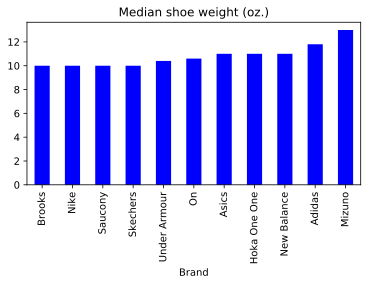

In [52]:
''' Plot of median weight of the Brands '''


plt.figure(figsize = (6,3))
df1.groupby('Brand')['Weight(oz)'].median().sort_values(ascending = True).plot.bar(color = 'blue')    
plt.title('Median shoe weight (oz.)')

plt.show() 


In [53]:
''' Median Weight of the top 11 Brands '''

df1.groupby('Brand')['Weight(oz)'].median().sort_values(ascending = True)  


Brand
Brooks          10.0
Nike            10.0
Saucony         10.0
Skechers        10.0
Under Armour    10.4
On              10.6
Asics           11.0
Hoka One One    11.0
New Balance     11.0
Adidas          11.8
Mizuno          13.0
Name: Weight(oz), dtype: float64

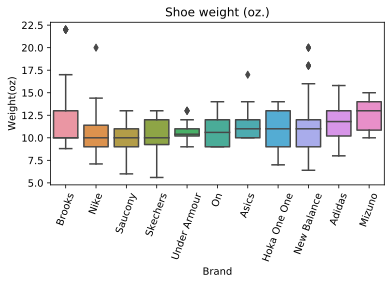

In [54]:
''' Boxplot of weight range of the top 11 brands => ordered by median price '''

plt.figure(figsize = (6, 3)) 
 
#ax = sns.boxplot(x = 'Brand', y = 'Price(USD)', data = df1, color = 'lightgreen') 
ax = sns.boxplot(x = 'Brand', y = 'Weight(oz)', data = df1, order = ['Brooks', 'Nike', 'Saucony', 'Skechers',
                                                                     'Under Armour', 'On', 'Asics', 'Hoka One One', 
                                                                     'New Balance', 'Adidas', 'Mizuno']) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  
plt.title('Shoe weight (oz.)')
plt.show()  



<Figure size 432x216 with 0 Axes>

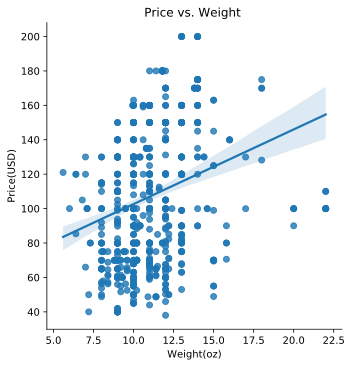

In [55]:
''' Scatter plot of Price vs. Weight '''

plt.figure(figsize = (6, 3))    

sns.lmplot("Weight(oz)", "Price(USD)", df1) 
plt.title('Price vs. Weight ')

plt.show() 


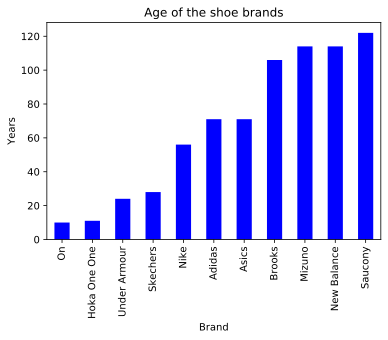

In [56]:
''' Age of the Brands '''

df1.groupby('Brand')['AgeOfBrand(yrs)'].median().sort_values(ascending = True).plot.bar(color = 'blue')
plt.title('Age of the shoe brands')  
plt.ylabel('Years')

plt.show()   


<Figure size 288x144 with 0 Axes>

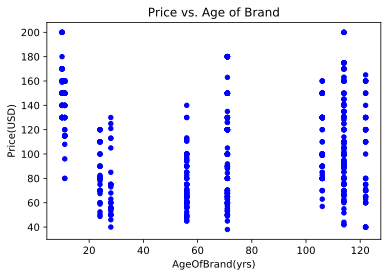

In [57]:
''' Scatter plot of Price vs. Age '''

plt.figure(figsize = (4,2))   
df1.plot.scatter('AgeOfBrand(yrs)', 'Price(USD)', color = 'blue')  
plt.title('Price vs. Age of Brand')

plt.show()  

<Figure size 432x216 with 0 Axes>

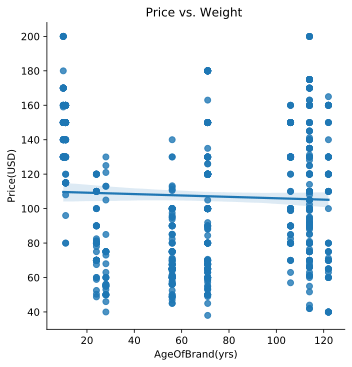

In [58]:
''' Scatter plot of Price vs. Age: using Seaborn for linear regression line  '''    

plt.figure(figsize = (6, 3))    

sns.lmplot("AgeOfBrand(yrs)", "Price(USD)", df1) 
plt.title('Price vs. Weight ')

plt.show() 

<Figure size 432x216 with 0 Axes>

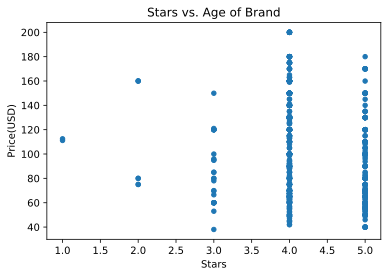

In [59]:

''' Scatter plot of Stars vs. Age '''

plt.figure(figsize = (6,3))   
df1.plot.scatter('Stars', 'Price(USD)')  
plt.title('Stars vs. Age of Brand')

plt.show()  


In [67]:


df1.groupby('Brand')['TrueToSize(%)', 'TrueToWidth(%)'].agg('median', 'std')    

df1.groupby('Brand')['Stars'].agg(['median', 'std'])


C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


TypeError: median() takes 1 positional argument but 2 were given

In [62]:

df_Asics.head(10)   



,Brand,Model,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
87,Asics,GEL-Contend 5 Walker,71,58.94,5.0,10.0,40.0,87.0,87.0
88,Asics,GEL-Contend 5 Walker,71,58.50,5.0,10.0,40.0,87.0,87.0
89,Asics,GEL-Contend 6,71,44.94,4.0,10.0,92.0,75.0,69.0
90,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
91,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
92,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
93,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
94,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
95,Asics,GEL-Contend 6,71,49.95,4.0,10.0,92.0,75.0,69.0
96,Asics,GEL-Cumulus 21,71,99.95,4.0,11.0,90.0,97.0,84.0


In [63]:

df_Asics.describe()

,AgeOfBrand(yrs),Price(USD),Stars,Weight(oz),TrueToSize(%),TrueToWidth(%),ArchSupport(%)
count,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,71.0,107.871845,4.262136,11.252427,84.106796,84.485437,77.864078
std,0.0,32.251542,0.463600,1.426077,12.351004,10.641082,12.761038
min,71.0,44.940000,3.000000,10.000000,40.000000,67.000000,60.000000
25%,71.0,78.945000,4.000000,10.000000,75.000000,75.000000,67.000000
50%,71.0,119.950000,4.000000,11.000000,88.000000,85.000000,76.000000
75%,71.0,129.950000,5.000000,12.000000,90.000000,97.000000,85.000000
max,71.0,149.950000,5.000000,17.000000,100.000000,100.000000,100.000000


In [ ]:

res = data.loc[:, ['CHAS', 'MEDV']].groupby('CHAS').agg(['median', 'std'])
print(res)




In [ ]:
gdp_merge.groupby(['Income Group', 'Region'])[['GDP']].agg(np.mean).loc[['High income: OECD', 'High income: nonOECD']]

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

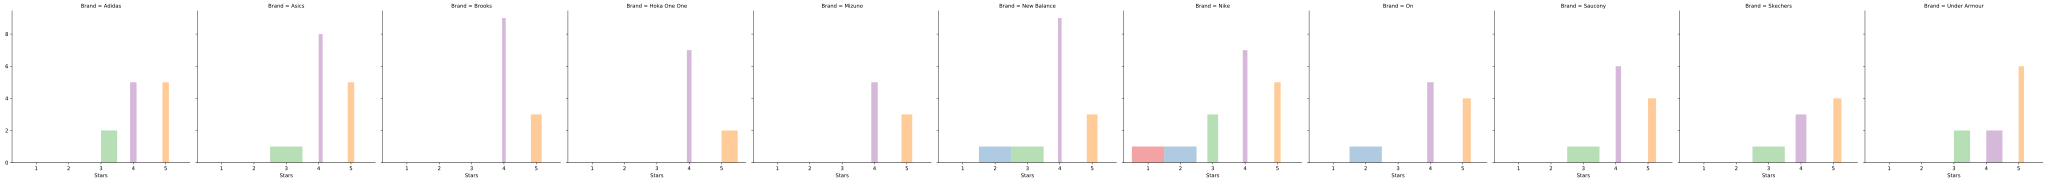

In [75]:
# Facet grid for Brand <-> Stars  

SexGrid = sns.FacetGrid(df1, col = 'Brand', hue = "Stars", palette = "Set1", height = 2)
SexGrid.map(sns.distplot, 'Stars')

